# Supervised Machine Learning: Regression and Classification

In [1]:
import sys
sys.path.insert(0, './work/machine_learning/01 - supervised_ml_regression_classification')

import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl

from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace, unix_timestamp, col, regexp_replace
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.stat import Correlation

import numpy as np
import math

## Pyspark config

In [2]:
# SPAWN A SPARKSESSION
spark = SparkSession.\
        builder.\
        appName("pyspark-notebook").\
        master("spark://spark-master:7077").\
        config("spark.executor.cores", "12").\
        config("spark.executor.memory", "1024mb").\
        getOrCreate()

In [3]:
# Read dataset for this course and cache() it
data = spark.read.csv(path="hdfs://namenode:9000/data/when2heat.csv", sep=";", header=True)

data.cache()

DataFrame[utc_timestamp: string, cet_cest_timestamp: string, AT_COP_ASHP_floor: string, AT_COP_ASHP_radiator: string, AT_COP_ASHP_water: string, AT_COP_GSHP_floor: string, AT_COP_GSHP_radiator: string, AT_COP_GSHP_water: string, AT_COP_WSHP_floor: string, AT_COP_WSHP_radiator: string, AT_COP_WSHP_water: string, AT_heat_demand_space: string, AT_heat_demand_space_COM: string, AT_heat_demand_space_MFH: string, AT_heat_demand_space_SFH: string, AT_heat_demand_total: string, AT_heat_demand_water: string, AT_heat_demand_water_COM: string, AT_heat_demand_water_MFH: string, AT_heat_demand_water_SFH: string, AT_heat_profile_space_COM: string, AT_heat_profile_space_MFH: string, AT_heat_profile_space_SFH: string, AT_heat_profile_water_COM: string, AT_heat_profile_water_MFH: string, AT_heat_profile_water_SFH: string, BE_COP_ASHP_floor: string, BE_COP_ASHP_radiator: string, BE_COP_ASHP_water: string, BE_COP_GSHP_floor: string, BE_COP_GSHP_radiator: string, BE_COP_GSHP_water: string, BE_COP_WSHP_flo

In [ ]:
# PERFORM TRANSFORMATIONS TO DATAFRAME BY REPLACING COMMAS WITH DOTS AND CAST TO INT 

data = data.select([regexp_replace(col, r'[,]', '.').alias(col) for col in data.columns])\
        .withColumn("utc_timestamp", unix_timestamp("utc_timestamp", format="yyyy-MM-dd'T'kk:mm:ss'Z'").cast('int'))\
        .withColumn("AT_heat_demand_space", col("AT_heat_demand_space").cast('int'))

In [ ]:
data.show()

## Week 2

### Multiple Linear Regression

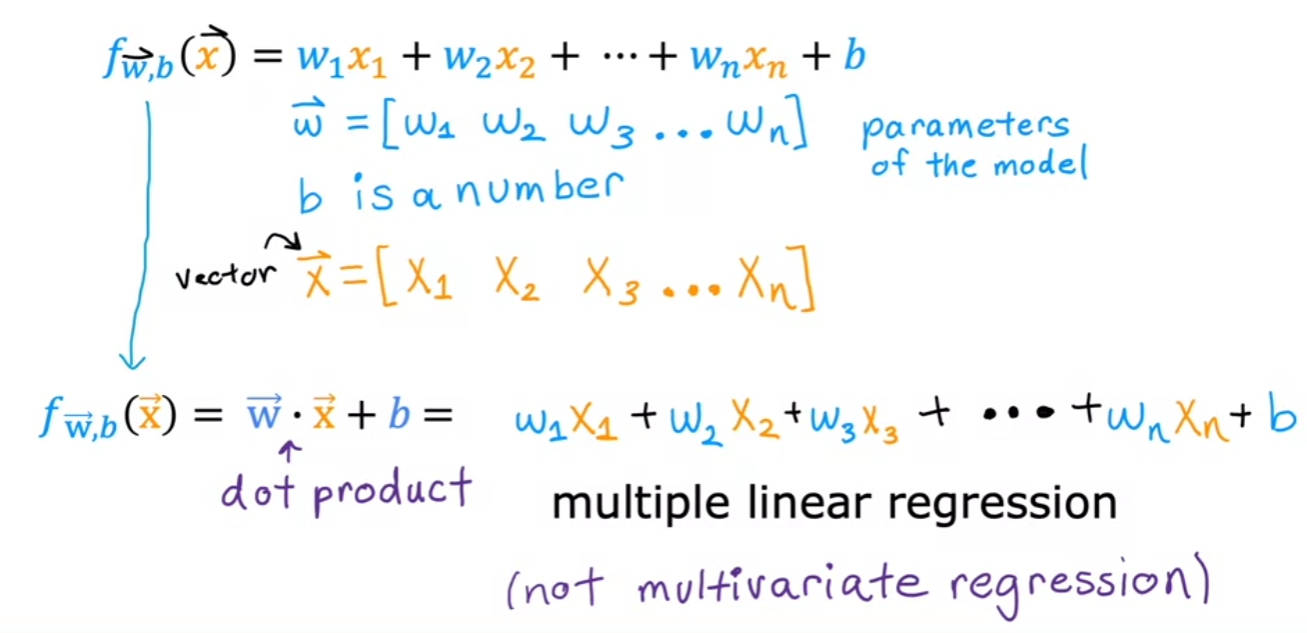